In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from mesh import *
import pyvista as pv
from itkwidgets import view
import vtk
import vtk.util.numpy_support as np_support



In [2]:
import gmsh


gmsh.initialize()
# gmsh.fltk.initialize()

# Lets create a simple square element:
model = gmsh.model
geo   = model.geo
option= gmsh.option



hight = 1
width = 1
he    = 1.0/5

P1 = geo.addPoint(     -width/2.0,    hight/2.0, 0, he, 1)
P2 = geo.addPoint(     -width/2.0,   -hight/2.0, 0, he, 2)
P3 = geo.addPoint(width-width/2.0,    hight/2.0, 0, he, 3)
P4 = geo.addPoint(width-width/2.0,   -hight/2.0, 0, he, 4)

L1 = geo.addLine(P1,P2) # Left
L2 = geo.addLine(P2,P4) # bottom
L3 = geo.addLine(P4,P3) # right
L4 = geo.addLine(P3,P1) # up

loop1 = geo.addCurveLoop([L1,L2,L3,L4])

surface = geo.addPlaneSurface([loop1])

model.addPhysicalGroup(0, [P2], 200 )
model.addPhysicalGroup(1, [L1], 201 )
model.addPhysicalGroup(1, [L2], 202 )
model.addPhysicalGroup(1, [L3], 203 )
model.addPhysicalGroup(1, [L4], 204 )
model.addPhysicalGroup(2, [surface], 301 )

model.setPhysicalName(0,200,"Pressure")
model.setPhysicalName(1,201,"left")
model.setPhysicalName(1,202,"bottom")
model.setPhysicalName(1,203,"right")
model.setPhysicalName(1,204,"up")
model.setPhysicalName(2,301,"fluid")


geo.synchronize()

# model.mesh.setRecombine(2)
option.setNumber('Mesh.ElementOrder',2)


model.mesh.generate(2)

gmsh.write("test.msh")
# gmsh.fltk.run()

# gmsh.fltk.finalize()

# gmsh.finalize()

In [3]:
Th = mesh.from_gmsh(gmsh)

print(gmsh.model.getDimension())
gmsh.finalize()

2


A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.


In [9]:
pd = []
pd.append(-np.sqrt(Th.nodes[:,0]**2+Th.nodes[:,1]**2))
pd.append(Th.nodes)

pd_names = ['Radius','Other values']

In [18]:
import pyvista as pv

# p = pv.BackgroundPlotter()
p = pv.Plotter(notebook=True)

AttributeError: module 'pyvista' has no attribute 'PlotterITK'

0
1
2


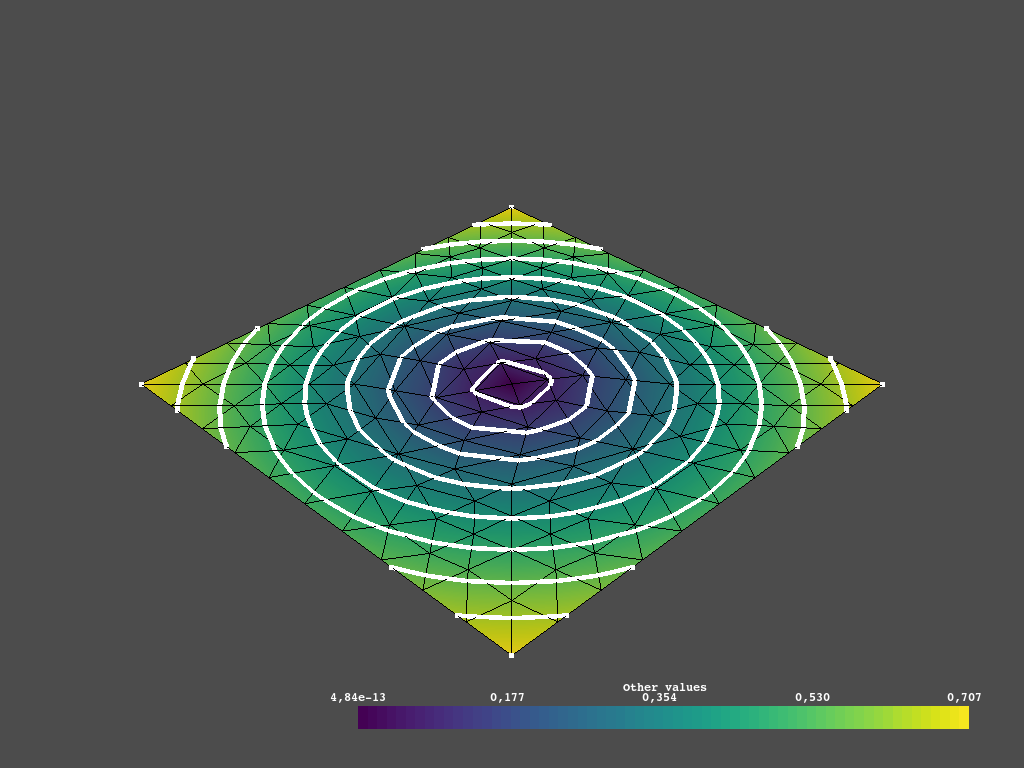

In [17]:

p.clear()
grid = Th.to_pv(pd = pd, pd_names=pd_names)
grid.set_active_scalar("Other values")
p.add_mesh(grid,show_edges=True)
contours = grid.contour()
p.add_mesh(contours, color="white", line_width=5)
# def callback(val):
    
# p.add_slider_widget(callback)
# p.show_bounds( location='back', all_edges=True)
p.show()

<IPython.core.display.Javascript object>


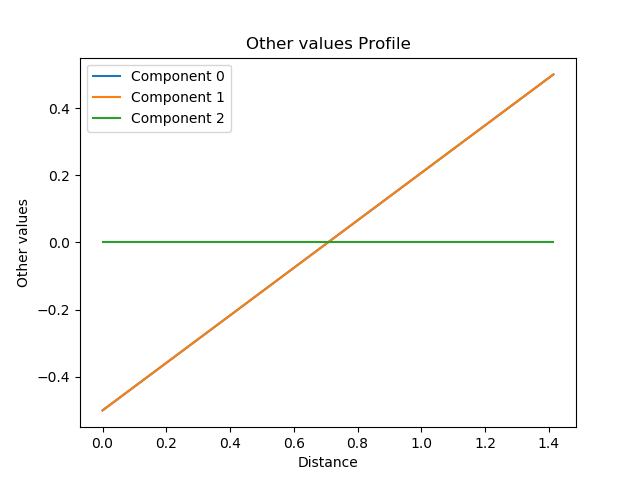

In [12]:
a = [-0.5,-0.5, 0.0]
b = [ 0.5, 0.5, 0.0]
# plt.figure()
grid.plot_over_line(a, b,scalars="Other values", resolution=100)
# plt.show()

In [ ]:
print(Th.get_all_elements_pd().to_string())

In [ ]:
pd

In [ ]:
grid = Th.to_vtk(dims = [0,1,2], pd = pd, pd_names=pd_names)

In [ ]:
Th.elements[3]

In [ ]:
Th.xyzInit

In [ ]:
view(geometries = grid, point_set=Th.nodes)

In [ ]:
pvgrid = pv.UnstructuredGrid(grid)

In [ ]:
pvgrid.save("test_pyvista.vtk",binary=False)

In [ ]:
ncells = Th.elements[2]['tags'][0].size
cell_type = np.zeros(ncells,dtype = np.int64)
cell_offset = np.zeros(ncells,dtype=np.int64)
npoints_cell = 6

In [ ]:
for i in range(ncells):
    cell_type[i] = element_type_map_vtk[Th.elements[2]['types'][0]]
cell_type

In [ ]:
sixes = np.full((Th.elements[2]['nodes'][0].shape[0],1),6,dtype = Th.elements[2]['nodes'][0].dtype)

In [ ]:
sixes.dtype

In [ ]:

cells = np.c_[sixes,Th.elements[2]['nodes'][0]].flatten()

In [ ]:
cells

In [ ]:
offset = np.arange(0,ncells*(npoints_cell+1),npoints_cell+1,dtype=int)

In [ ]:
offset

In [ ]:
cells

In [ ]:
cell_type.dtype

In [ ]:
points = Th.nodes

In [ ]:
offset

In [ ]:
i=0
nels = 1
cellsi = cells[offset[i]:offset[i+nels]]
cell_typei = cell_type[i:i+nels]
offseti= offset[i:i+nels]

In [ ]:
cellsi

In [ ]:
cell_typei

In [ ]:

offseti

In [ ]:
grid = pv.UnstructuredGrid(offset, cells, cell_type, points,deep=True)

In [ ]:
grid["field"] = Th.nodes[:, 0]
grid["value"] = np.c_[Th.nodes,Th.nodes,Th.nodes]

In [ ]:
view(geometries=grid)

In [ ]:
grid.save("lala.vtk",binary=False)

In [ ]:

gridi = pv.UnstructuredGrid(offseti, cellsi, cell_typei, points, deep=True)

In [ ]:
gridi

In [ ]:
A = np.zeros(3)
B = np.full(7,3)

In [ ]:
np.concatenate((A,B),axis=None)

In [ ]:
grid

In [ ]:


vtk_pts = vtk.vtkPoints()
vtk_pts.SetData(np_support.numpy_to_vtk(points,deep=1))

vtk_grid = vtk.vtkUnstructuredGrid()

vtk_grid.SetPoints(vtk_pts)


vtk_grid.Allocate(ncells)

for i in range(1):
    
    vtk_grid.InsertNextCell(cell_type[i], npoints_cell, cells[offset[i]:offset[i+1]])





In [ ]:
vtk_grid.GetNumberOfCells()

In [ ]:
view(geometries = vtk_grid, point_sets=[points])

In [ ]:
grid = pv.UnstructuredGrid(offset, cells, cell_type, points)

In [ ]:
view(geometries = gridi, point_sets=[points])

In [ ]:
view(geometries = grid, point_sets=[points], show_edges=True, cmap="Plasma (matplotlib)")

In [ ]:
points

In [ ]:

grid = pv.UnstructuredGrid(offset, cells, cell_type, points)

# view(geometries=grid, show_edges=True, cmap="Plasma (matplotlib)")
view(geometries = grid,point_sets=[points], show_edges=True, cmap="Plasma (matplotlib)")


In [ ]:


# offset array.  Identifies the start of each cell in the cells array
offset = np.array([0, 9])

# Contains information on the points composing each cell.
# Each cell begins with the number of points in the cell and then the points
# composing the cell
cells = np.array([8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15])

# cell type array. Contains the cell type of each cell
cell_type = np.array([vtk.VTK_HEXAHEDRON, vtk.VTK_HEXAHEDRON])

cell1 = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1],
    ]
)

cell2 = np.array(
    [
        [0, 0, 2],
        [1, 0, 2],
        [1, 1, 2],
        [0, 1, 2],
        [0, 0, 3],
        [1, 0, 3],
        [1, 1, 3],
        [0, 1, 3],
    ]
)

# points of the cell array
points = np.vstack((cell1, cell2))
points = points.astype(np.float64)
# create the unstructured grid directly from the numpy arrays
grid = pv.UnstructuredGrid(offset, cells, cell_type, points)
point_cloud = pv.PolyData(points)
# plot the grid
view(point_sets=[points], show_edges=False, cmap="Plasma (matplotlib)")
# grid.plot(show_edges=True)

In [ ]:
cell_type.dtype

In [ ]:
points.dtype

In [ ]:
grid.points

In [ ]:
import pyvista as pv


cyl = pv.Cylinder()
arrow = pv.Arrow()
sphere = pv.Sphere()
plane = pv.Plane()
line = pv.Line()
box = pv.Box()
cone = pv.Cone()
poly = pv.Polygon()
disc = pv.Disc()


p = pv.Plotter(shape=(3, 3))

# Top row
p.subplot(0, 0)
p.add_mesh(cyl, color="tan", show_edges=True)
p.subplot(0, 1)
p.add_mesh(arrow, color="tan", show_edges=True)
p.subplot(0, 2)
p.add_mesh(sphere, color="tan", show_edges=True)

# Middle row
p.subplot(1, 0)
p.add_mesh(plane, color="tan", show_edges=True)
p.subplot(1, 1)
p.add_mesh(line, color="tan", line_width=3)
p.subplot(1, 2)
p.add_mesh(box, color="tan", show_edges=True)

# Bottom row
p.subplot(2, 0)
p.add_mesh(cone, color="tan", show_edges=True)
p.subplot(2, 1)
p.add_mesh(poly, color="tan", show_edges=True)
p.subplot(2, 2)
p.add_mesh(disc, color="tan", show_edges=True)

# Render all of them
# view(geometries = cone)
p.show()

In [ ]:
pv.__version__

In [ ]:
import pyvista as pv
from pyvista import examples

dataset = examples.load_hexbeam()

p = pv.BackgroundPlotter()

p.add_mesh(dataset)

p.show_bounds(grid=True, location='back',all_edges=True)

In [ ]:
p.add_mesh(pv.UnstructuredGrid(grid))

In [ ]:
p.s